In [1]:
%matplotlib inline

In [2]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [3]:

from google.colab import drive
drive.mount('/content/gdrive')

colab_path='/content/gdrive'
file_path = colab_path+'/MyDrive/Colab Notebooks/디지털사운드/9주차/02_AdjustAmplitude.wav'
y, sr = librosa.load(file_path, sr=None, duration=10) #sr(sampling rate): default 22050
#sr을 None으로 설정하면 : 원래 파일이 갖고 있던 오리지널 샘플링레이트가 들어온다.
duration=librosa.get_duration(y, sr)
#len(y) #number of samples
sr*duration #number of samples
#len(y) == sr*duration


Mounted at /content/gdrive


480000.0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


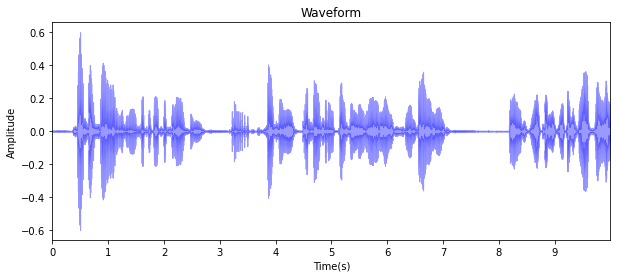

In [4]:
#9주차 내용
fig = plt.figure(figsize=(10,4))
librosa.display.waveplot(y, sr=sr, alpha=0.4, color='#0000ff')
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
ipd.Audio(y, rate=sr)

480000

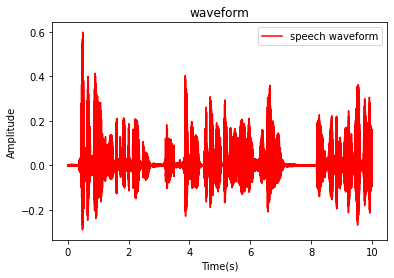

In [ ]:
#10주차 내용
time = np.linspace(0, len(y)/sr, len(y))
#linespace (부터, 까지, 간격[=샘플갯수])

fig, ax = plt.subplots()
ax.plot(time, y, color='r', label='speech waveform')
ax.set_xlabel("Time(s)")
ax.set_ylabel("Amplitude")
ax.legend()
plt.title("waveform")
len(y)

**Spectrum: 주파수 분석**

In [ ]:
fft = np.fft.fft(y)
spectrum = np.abs(fft)
f = np.linspace(0, sr, len(spectrum))

#나이퀴스트 이론에 따라 left만 남김 : 소리는 압축과 팽창을 하나로 봐야한다는 것.
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

Text(0.5, 1.0, 'Spectrum')

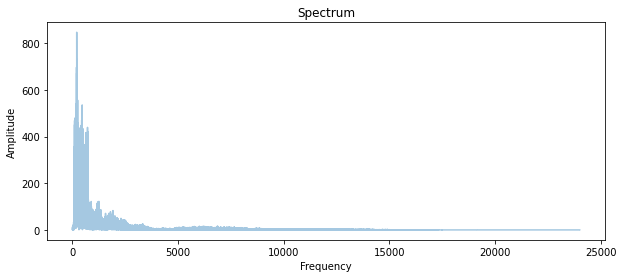

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Spectrum")

**Spectrogram - STFT(Short-Time Fourier Transform)**

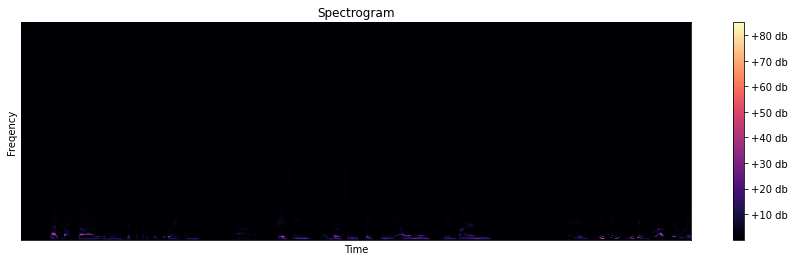

In [ ]:
hop_length = 512 # 샘플의 수
n_fft = 2048 # 윈도우 # spectral resolution / window length

stft = librosa.stft(y, n_fft=n_fft, hop_length = hop_length)
spectrogram = np.abs(stft)

plt.figure(figsize=(15,4))
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length);
plt.xlabel("Time")
plt.ylabel("Freqency")
plt.colorbar(format="%+2.0f db");
plt.title('Spectrogram');


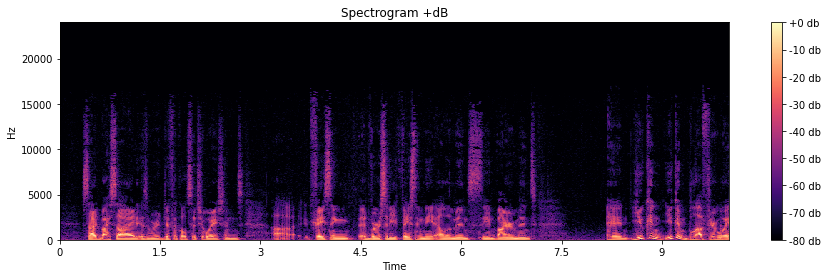

In [ ]:
stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
spec = np.abs(stft)
spectrogram = librosa.amplitude_to_db(spec, ref=np.max)

plt.figure(figsize=(15,4))
librosa.display.specshow(spectrogram, sr=sr, x_axis="time", y_axis="linear");
#plt.xlabel("Time")
#plt.ylabel("Freqency")
plt.colorbar(format="%+2.0f db");
plt.title('Spectrogram +dB');

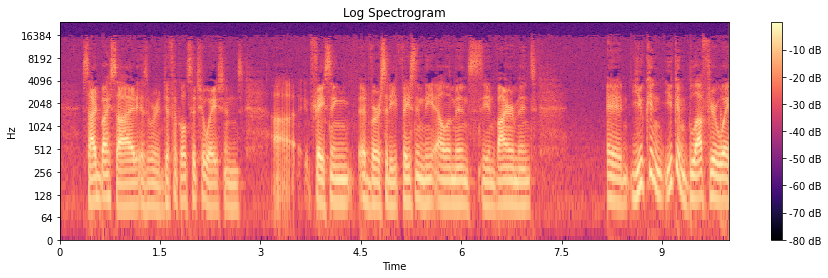

In [ ]:
stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
spectrogram = np.abs(stft)
spec = librosa.power_to_db(spectrogram, ref=np.max)

plt.figure(figsize=(15,4))
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Log Spectrogram');

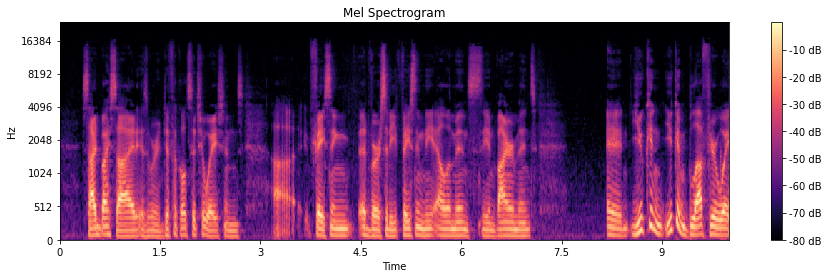

In [ ]:
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)

plt.figure(figsize=(15,4))
librosa.display.specshow(mel_spect, sr=sr, y_axis='mel', fmax=24000, x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

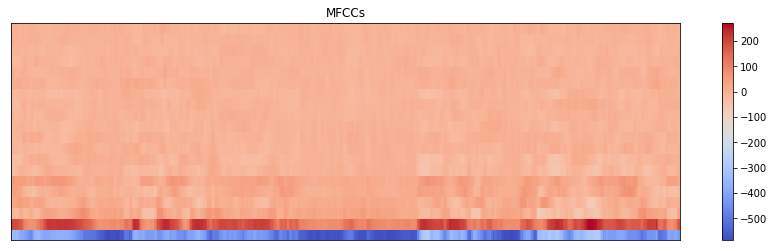

In [ ]:
#MFCCs(Mel-Frequency Cepstral Coefficient) 공명주파수 분석을 통해 화자를 분석하는 기술에 쓰임.
MFCCs = librosa.feature.mfcc(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=20)

plt.figure(figsize=(15,4))
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length);
plt.xlabel = 'time'
plt.ylabel = 'MFCC coefficients'
plt.colorbar();
plt.title('MFCCs');